In [2]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import os
%matplotlib inline

In [3]:
df = pd.read_csv(r"Filepath to the csv file\Life Expectancy Data.csv")
df.head()


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:
#quick cleaning of the column/variable titles

# Renaming some column names as they contain trailing spaces. Replacing the spaces with underscore
df.rename(columns={" BMI ":"bmi","Life expectancy ":"life_expectancy","Adult Mortality":"adult_mortality","Country":"country","Year":"year","Status":"status",
                   "infant deaths":"infant_deaths","percentage expenditure":"percentage_expenditure","Polio":"polio",
                   "Hepatitis B":"hepatitis_b","Measles ":"measles"," BMI ":"bmi","GDP":"gdp","Population":"population","Schooling":"schooling",
                   "under-five deaths ":"under-five_deaths","Diphtheria ":"diphtheria","Alcohol":"alcohol",
                  " HIV/AIDS":"hiv/aids"," thinness  1-19 years":"thinness_10-19_years"," thinness 5-9 years":"thinness_5-9_years","Income composition of resources":"income_composition_of_resources",
                   "Total expenditure":"total_expenditure"},inplace=True)

In [5]:
#To check for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country                          2938 non-null   object 
 1   year                             2938 non-null   int64  
 2   status                           2938 non-null   object 
 3   life_expectancy                  2928 non-null   float64
 4   adult_mortality                  2928 non-null   float64
 5   infant_deaths                    2938 non-null   int64  
 6   alcohol                          2744 non-null   float64
 7   percentage_expenditure           2938 non-null   float64
 8   hepatitis_b                      2385 non-null   float64
 9   measles                          2938 non-null   int64  
 10  bmi                              2904 non-null   float64
 11  under-five_deaths                2938 non-null   int64  
 12  polio               

In [6]:
#To check for possible erroneous values
#used iloc[:,1:] to call all columns except the COUNTRY and YEAR
df.describe().iloc[:,1:]

,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness_10-19_years,thinness_5-9_years,income_composition_of_resources,schooling
count,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


Descriptive statistical analysis of unclean data::::
-BMI index being unreasonably low and high(less than 10, greater than 50).
-Infant deaths have a minimum value of 0 which is close to impossible.
-Under-Five deaths have a minimum value of 0 which is close to impossible.


In [7]:
#Changing 0 values in Infant_deaths to NULL
#Changing BMI values (less than and greater than 50) to NULL
#Changing 0 values in Under-Five_deaths to NULL
df.infant_deaths = df.infant_deaths.replace(0, np.nan)
df.bmi = df.apply(lambda x: np.nan if (x.bmi < 10 or x.bmi > 50) else x.bmi, axis=1)
df['under-five_deaths'] = df['under-five_deaths'].replace(0, np.nan)

In [8]:
#Finding missing values
#Function belew eturns the columns that contain (explicit) nulls,
#...  keeps a running total of those columns with nulls as well as their location in the dataframe,
#...  returns the count of nulls in a specified column and the percent of nulls out of all the values in the column
def nulls_breakdown(df=df):
    df_cols = list(df.columns)
    cols_total_count = len(list(df.columns))
    cols_count = 0
    for loc, col in enumerate(df_cols):
        null_count = df[col].isnull().sum()
        total_count = df[col].isnull().count()
        percent_null = round(null_count/total_count*100, 2)
        if null_count > 0:
            cols_count += 1
            print('[iloc = {}] {} has {} null values: {}% null'.format(loc, col, null_count, percent_null))
    cols_percent_null = round(cols_count/cols_total_count*100, 2)
    print('Out of {} total columns, {} contain null values; {}% columns contain null values.'.format(cols_total_count, cols_count, cols_percent_null))

In [9]:
#Shows the percentage of null values per column/variable
nulls_breakdown()

[iloc = 3] life_expectancy has 10 null values: 0.34% null
[iloc = 4] adult_mortality has 10 null values: 0.34% null
[iloc = 5] infant_deaths has 848 null values: 28.86% null
[iloc = 6] alcohol has 194 null values: 6.6% null
[iloc = 8] hepatitis_b has 553 null values: 18.82% null
[iloc = 10] bmi has 1456 null values: 49.56% null
[iloc = 11] under-five_deaths has 785 null values: 26.72% null
[iloc = 12] polio has 19 null values: 0.65% null
[iloc = 13] total_expenditure has 226 null values: 7.69% null
[iloc = 14] diphtheria has 19 null values: 0.65% null
[iloc = 16] gdp has 448 null values: 15.25% null
[iloc = 17] population has 652 null values: 22.19% null
[iloc = 18] thinness_10-19_years has 34 null values: 1.16% null
[iloc = 19] thinness_5-9_years has 34 null values: 1.16% null
[iloc = 20] income_composition_of_resources has 167 null values: 5.68% null
[iloc = 21] schooling has 163 null values: 5.55% null
Out of 22 total columns, 16 contain null values; 72.73% columns contain null valu

In [10]:
#Imputing of the data for each Year is done here to get the average of the 'before' and 'after' year data to fill in with
#create a list for imputed data
imputed_data = []
for year in list(df.year.unique()):
    year_data = df[df.year == year].copy()
    #fill in data for each column starting from Life Expectancy
    for col in list(year_data.columns)[3:]:
        year_data[col] = year_data[col].fillna(year_data[col].dropna().mean()).copy()
        #Add filled in avergaes to the Imputed_data list
    imputed_data.append(year_data)
#Merge the imputed data with the dataframe    
df = pd.concat(imputed_data).copy()

In [11]:
#Verify if null values are taken care of
nulls_breakdown(df)

Out of 22 total columns, 0 contain null values; 0.0% columns contain null values.


ValueError: num must be 1 <= num <= 36, not 37

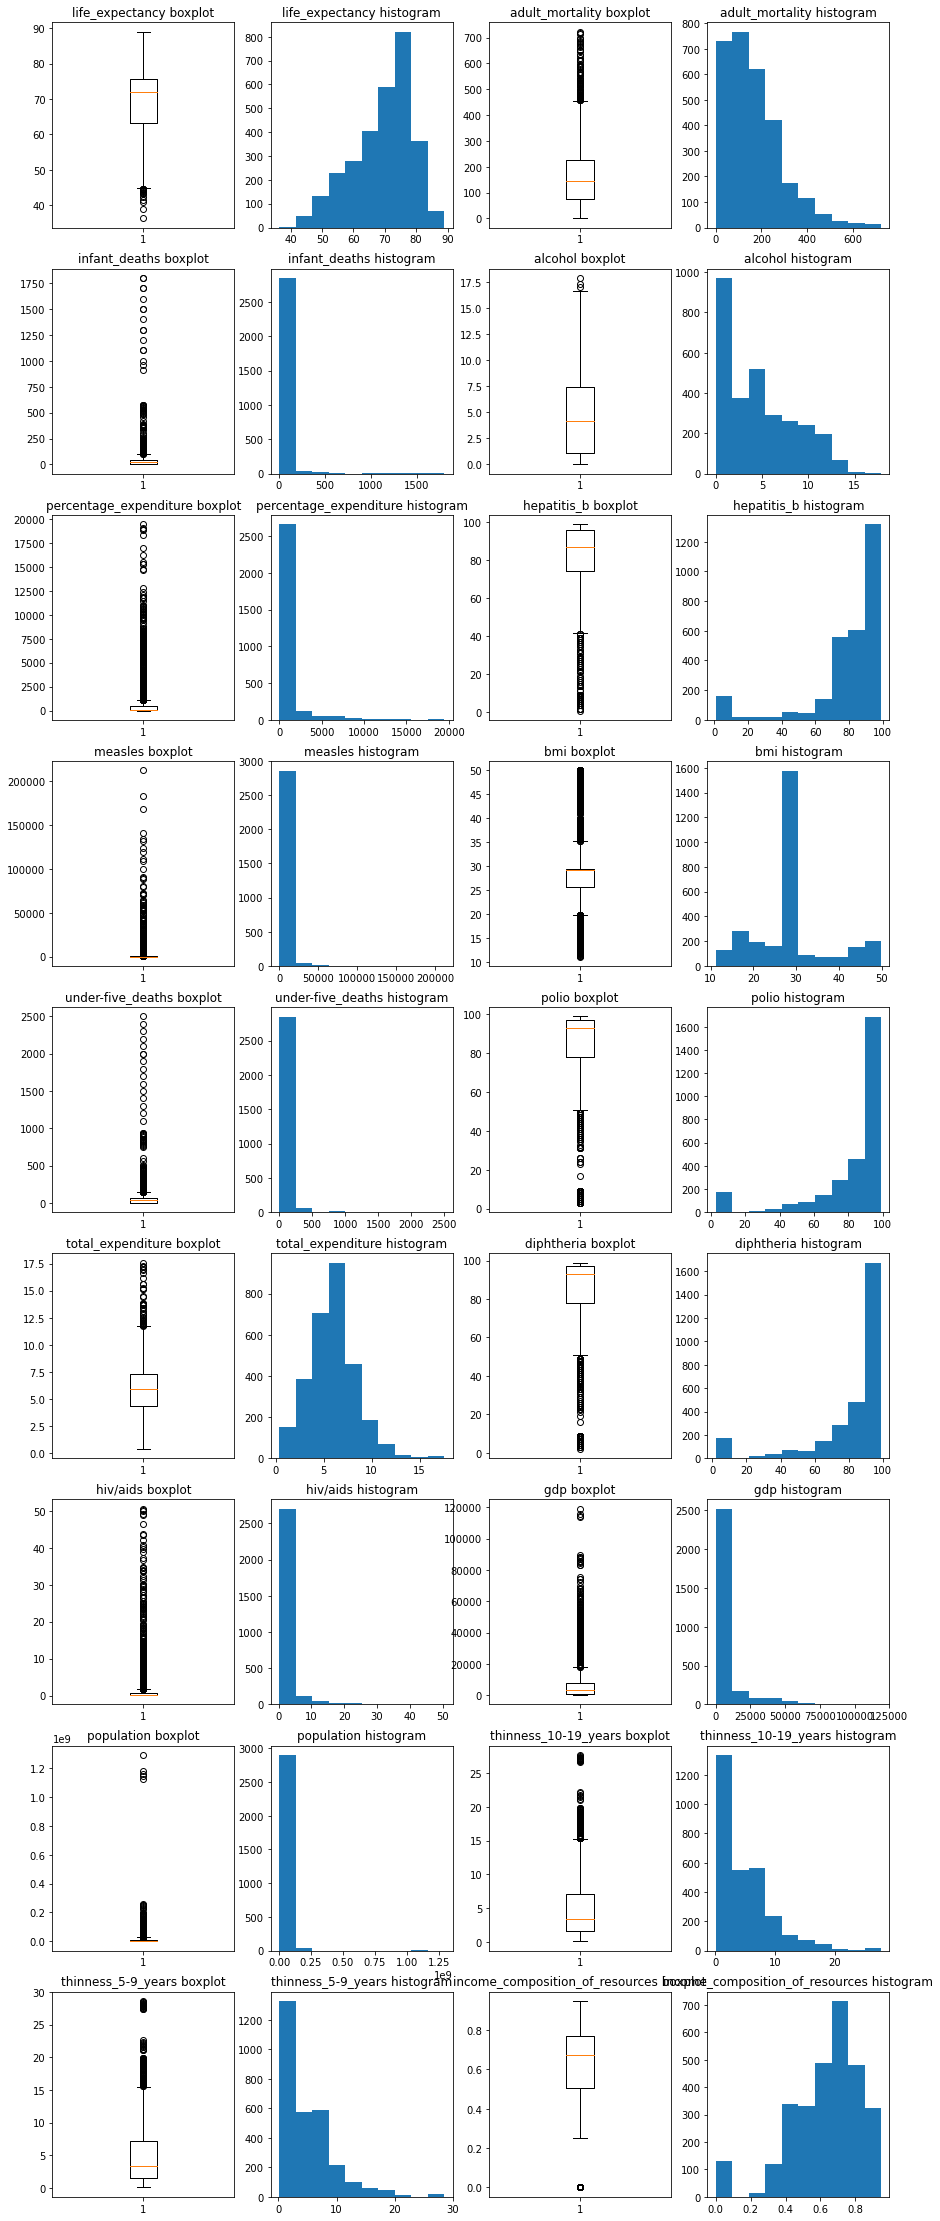

In [12]:
#Representing data of columns and variables with BOX PLOT and HISTOGRAM to show distribution
cont_vars = list(df.columns)[3:]
def outliers_visual(data):
    plt.figure(figsize=(15, 40))
    i = 0
    for col in cont_vars:
        i += 1
        plt.subplot(9, 4, i)
        plt.boxplot(data[col])
        plt.title('{} boxplot'.format(col))
        i += 1
        plt.subplot(9, 4, i)
        plt.hist(data[col])
        plt.title('{} histogram'.format(col))
    plt.show()
outliers_visual(df)

Boxplot and histogram will be created for each continuous variable in order to visually see if outliers exist.

In [13]:
#Calculation of Outliers using TUKEY METHOD
def outlier_count(col, data=df):
    print(15*'-' + col + 15*'-')
    q75, q25 = np.percentile(data[col], [75, 25])
    iqr = q75 - q25
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])
    outlier_percent = round(outlier_count/len(data[col])*100, 2)
    print('Number of outliers: {}'.format(outlier_count))
    print('Percent of data that is outlier: {}%'.format(outlier_percent))
    
for col in cont_vars:
    outlier_count(col)

---------------life_expectancy---------------
Number of outliers: 17
Percent of data that is outlier: 0.58%
---------------adult_mortality---------------
Number of outliers: 86
Percent of data that is outlier: 2.93%
---------------infant_deaths---------------
Number of outliers: 135
Percent of data that is outlier: 4.59%
---------------alcohol---------------
Number of outliers: 3
Percent of data that is outlier: 0.1%
---------------percentage_expenditure---------------
Number of outliers: 389
Percent of data that is outlier: 13.24%
---------------hepatitis_b---------------
Number of outliers: 222
Percent of data that is outlier: 7.56%
---------------measles---------------
Number of outliers: 542
Percent of data that is outlier: 18.45%
---------------bmi---------------
Number of outliers: 973
Percent of data that is outlier: 33.12%
---------------under-five_deaths---------------
Number of outliers: 142
Percent of data that is outlier: 4.83%
---------------polio---------------
Number of 

In [14]:
#Each variable has a unique amount of outliers and also has outliers on different sides of the data,
# The best route to take is probably winsorizing (limiting) the values for each variable on its own until no outliers remain.

#Function to winsorize data and compare visually
def test_wins(col, lower_limit=0, upper_limit=0, show_plot=True):
    wins_data = winsorize(df[col], limits=(lower_limit, upper_limit))
    wins_dict[col] = wins_data
    if show_plot == True:
        plt.figure(figsize=(15,5))
        plt.subplot(121)
        plt.boxplot(df[col])
        plt.title('original {}'.format(col))
        plt.subplot(122)
        plt.boxplot(wins_data)
        plt.title('wins=({},{}) {}'.format(lower_limit, upper_limit, col))
        plt.show()

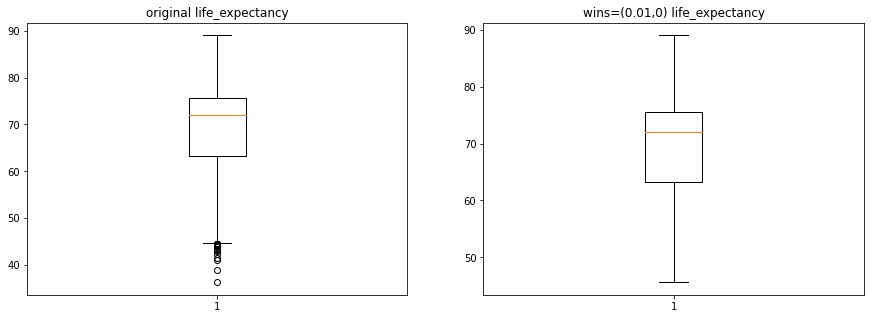

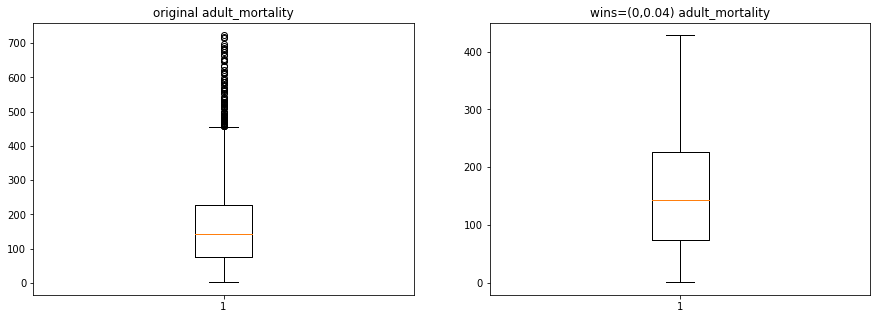

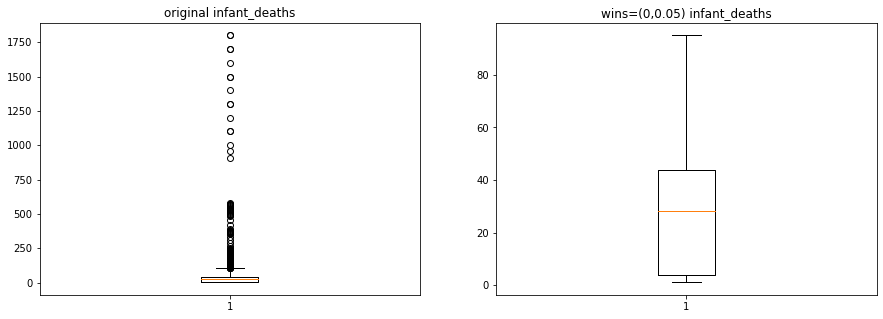

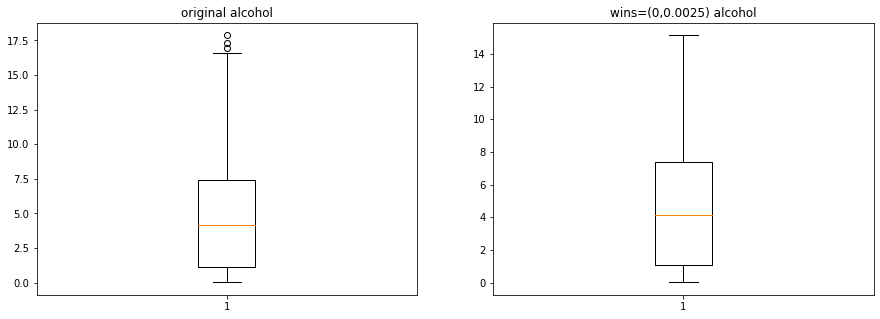

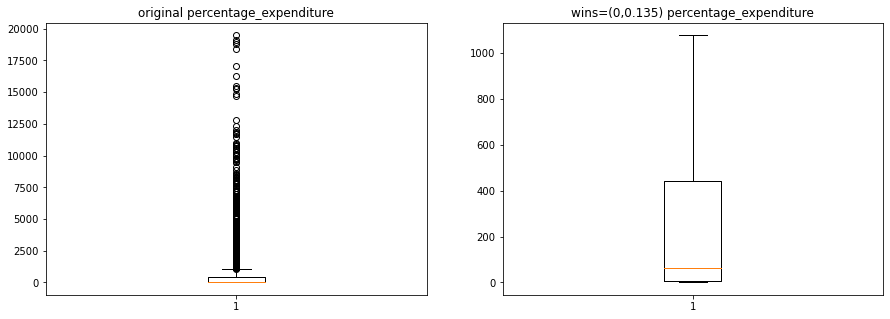

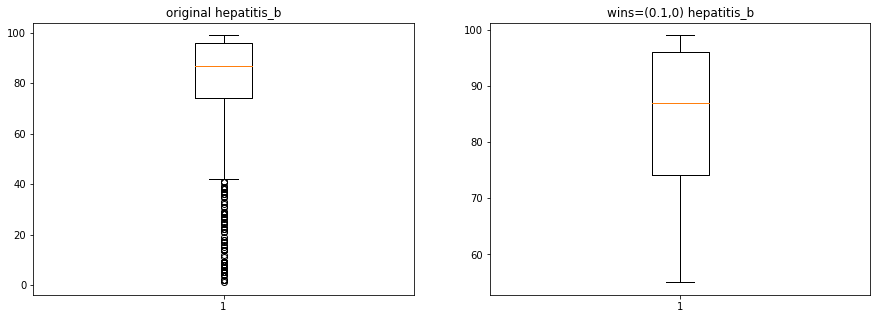

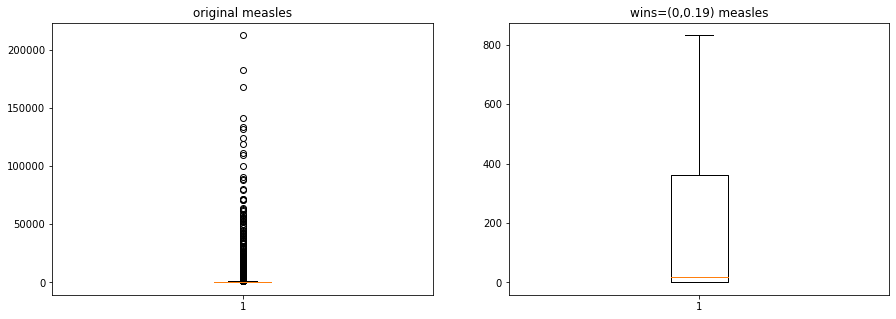

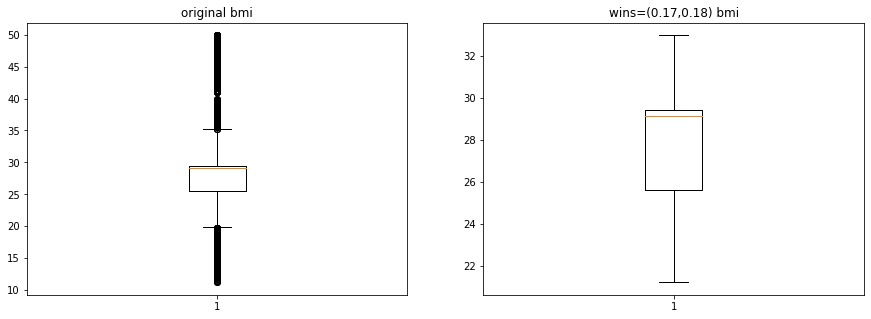

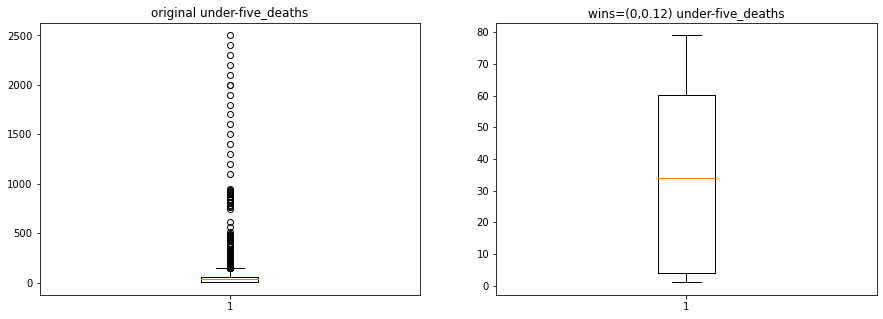

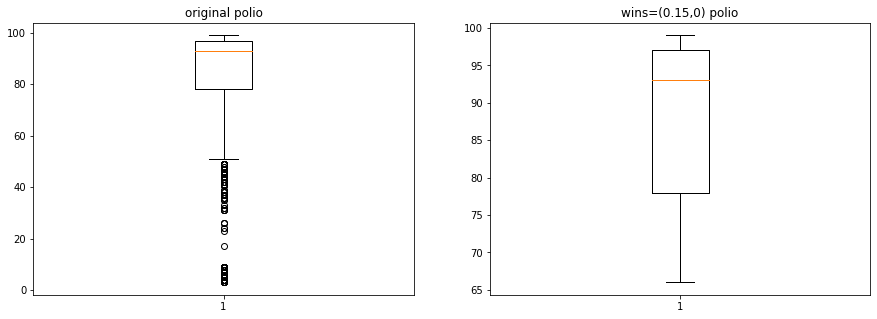

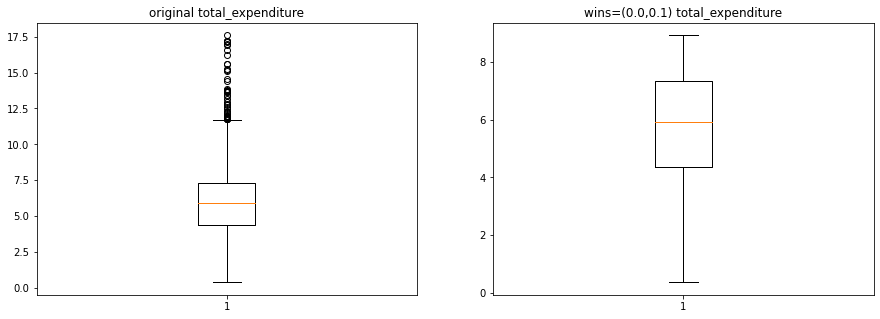

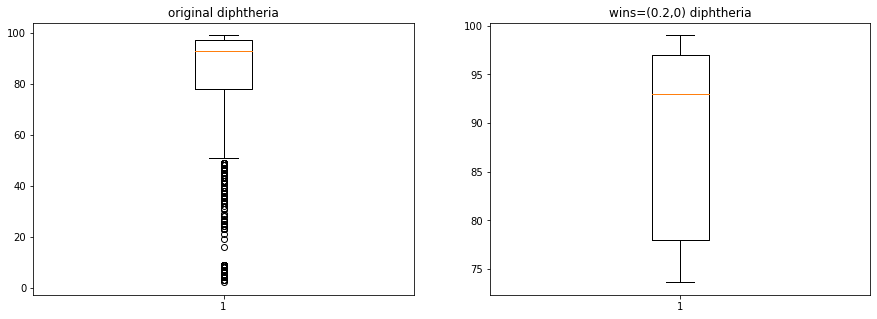

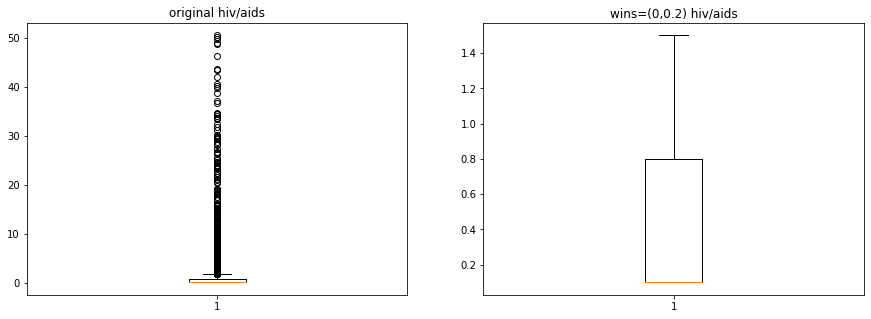

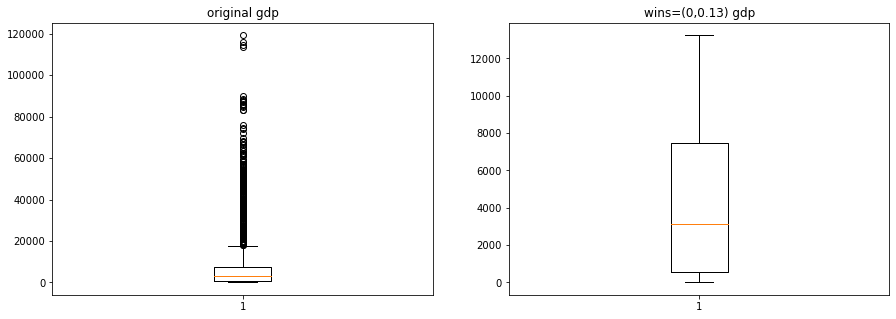

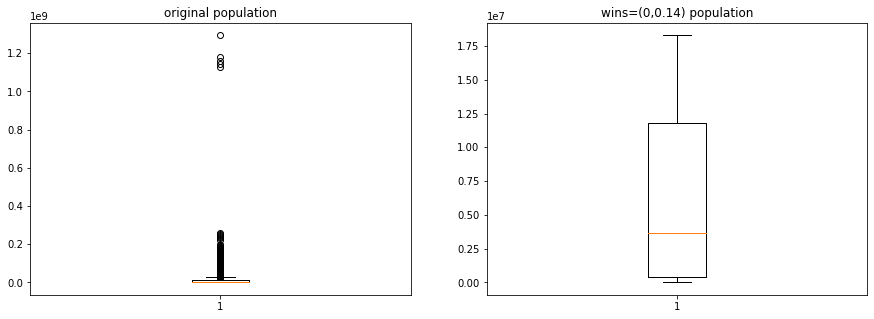

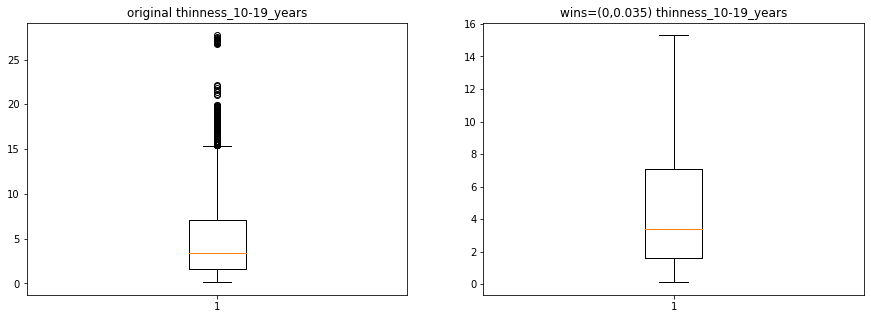

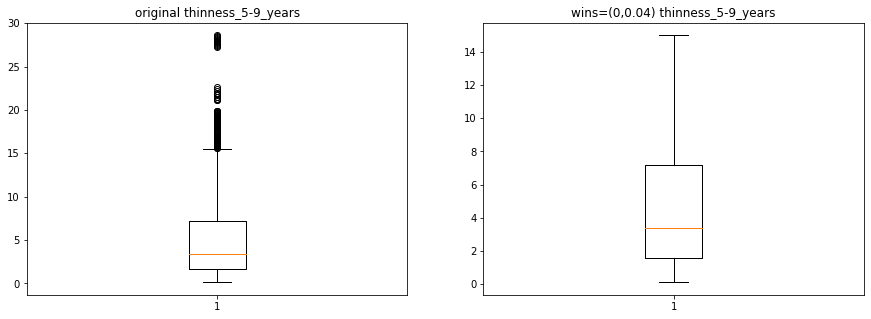

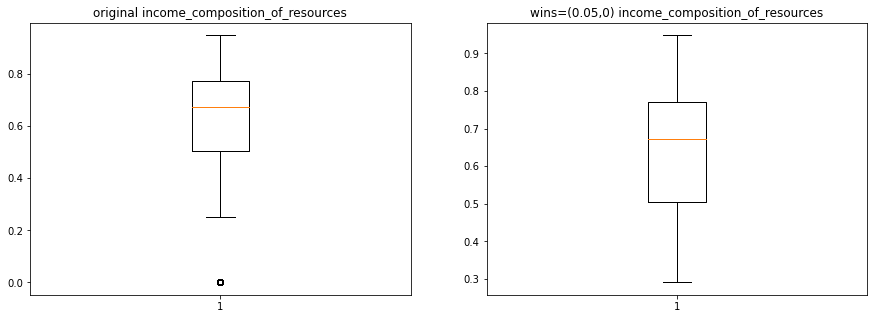

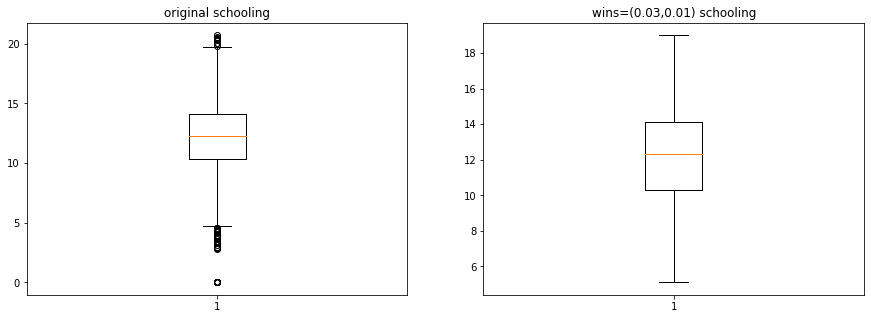

In [15]:
#Using visual assessment, upper and lower limits are set to get rid of outliers


wins_dict = {}
#life exectancy
test_wins(cont_vars[0], lower_limit=.01)
#adult maturity
test_wins(cont_vars[1], upper_limit=.04)
#infant deaths
test_wins(cont_vars[2], upper_limit=.05)
#alcohol 
test_wins(cont_vars[3], upper_limit=.0025)
#percentage expenditure
test_wins(cont_vars[4], upper_limit=.135)
#hepatitis B
test_wins(cont_vars[5], lower_limit=.1)
#measles 
test_wins(cont_vars[6], upper_limit=.19)
#BMI 
test_wins(cont_vars[7], lower_limit= 0.17, upper_limit=.18)
#Under-five deaths
test_wins(cont_vars[8], lower_limit=0, upper_limit = 0.12)
#Polio
test_wins(cont_vars[9], lower_limit= .15, upper_limit=0)
#total expenditure
test_wins(cont_vars[10], lower_limit=.0, upper_limit =.1)
#diphtheria 
test_wins(cont_vars[11], lower_limit = 0.2, upper_limit= 0)
#hiv/aids
test_wins(cont_vars[12], upper_limit=.2)
#GDP
test_wins(cont_vars[13], upper_limit=.13)
#Population
test_wins(cont_vars[14], upper_limit=.14)
#Thinness 10 - 19
test_wins(cont_vars[15], upper_limit=.035)
#Thinness 5- 9
test_wins(cont_vars[16], upper_limit=.04)
#Income composition of resources
test_wins(cont_vars[17], lower_limit=.05, upper_limit=0)
#Schooling
test_wins(cont_vars[18], lower_limit=.03, upper_limit =.01)

#--------------------------------------------------------------UNIVARIATE ANALYSIS----------------------------------------------------------------#

In [16]:
#Saving Winsorized data into new dataframe
wins_df = df.iloc[:, 0:3]
for col in cont_vars:
    wins_df[col] = wins_dict[col]

In [17]:
#Descriptive Statistics of the clean data
wins_df.describe()


,year,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness_10-19_years,thinness_5-9_years,income_composition_of_resources,schooling
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2.938000e+03,2938.000000,2938.000000,2938.000000,2938.000000
mean,2007.518720,69.248795,161.008390,28.607323,4.640667,281.501093,83.671293,220.691287,27.965130,34.283159,87.214820,5.846160,88.499688,0.469197,4617.435414,6.595678e+06,4.703351,4.701511,0.640659,12.051950
std,4.613841,9.462136,113.131159,25.699534,3.910036,384.161450,13.848933,329.192321,3.936324,28.861473,11.902868,2.069362,9.605616,0.569172,4562.467699,6.754515e+06,3.925702,3.913544,0.171622,3.064535
min,2000.000000,45.600000,1.000000,1.000000,0.010000,0.000000,55.000000,0.000000,21.200000,1.000000,66.000000,0.370000,73.627778,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.291000,5.100000
25%,2004.000000,63.200000,74.000000,4.000000,1.092500,4.685343,74.099237,0.000000,25.600000,4.000000,78.000000,4.370000,78.000000,0.100000,580.486996,4.189172e+05,1.600000,1.600000,0.504250,10.300000
50%,2008.000000,72.000000,144.000000,28.000000,4.140000,64.912906,87.000000,17.000000,29.153086,34.000000,93.000000,5.910000,93.000000,0.100000,3116.561755,3.675929e+06,3.400000,3.400000,0.673000,12.300000
75%,2012.000000,75.600000,227.000000,43.766917,7.390000,441.534144,96.000000,360.250000,29.444048,60.014815,97.000000,7.330000,97.000000,0.800000,7464.487887,1.181332e+07,7.100000,7.200000,0.772000,14.100000
max,2015.000000,89.000000,428.000000,95.000000,15.140000,1077.712092,99.000000,831.000000,33.000000,79.000000,99.000000,8.910000,99.000000,1.500000,13235.977570,1.828185e+07,15.300000,15.000000,0.948000,19.000000


In [18]:

wins_df.describe(include='O')

,country,status
count,2938,2938
unique,193,2
top,Niger,Developing
freq,16,2426


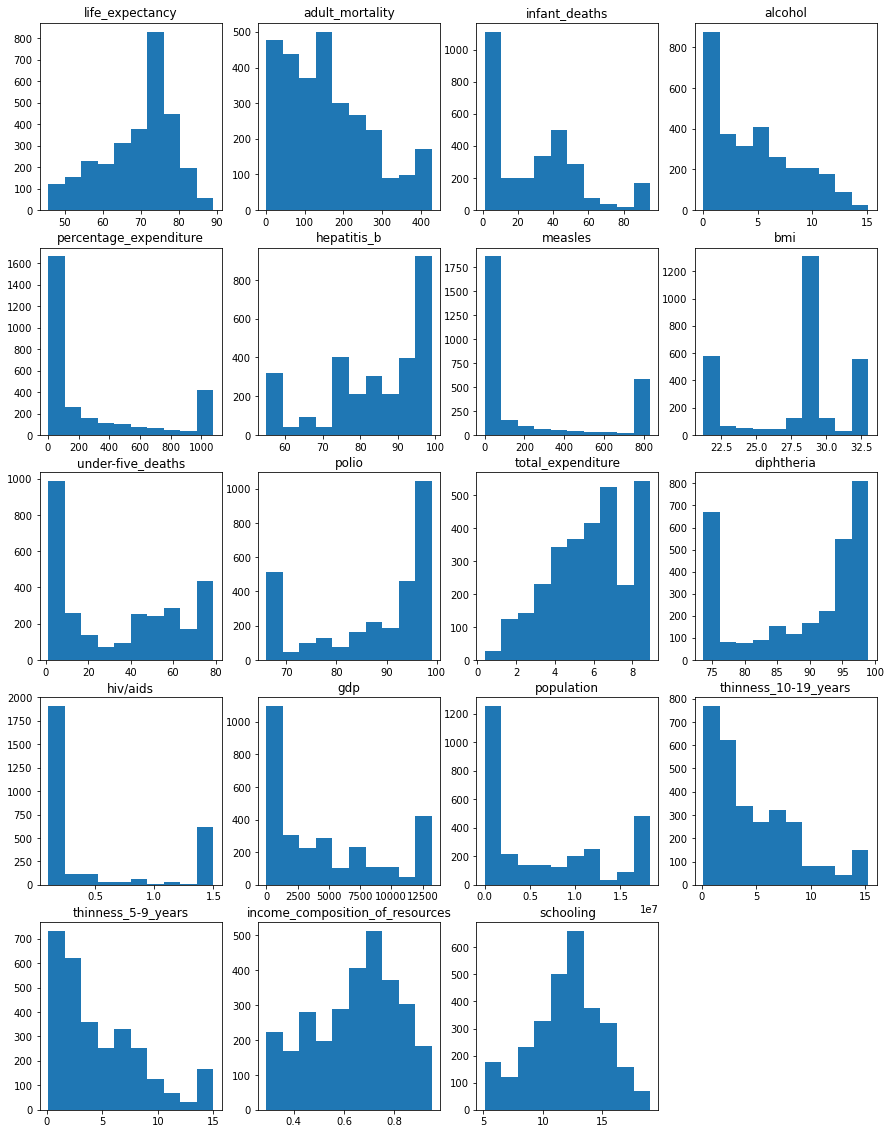

In [19]:
#Visual Distributions of the clean data
plt.figure(figsize=(15, 20))
for i, col in enumerate(cont_vars, 1):
    plt.subplot(5, 4, i)
    plt.hist(wins_df[col])
    plt.title(col)

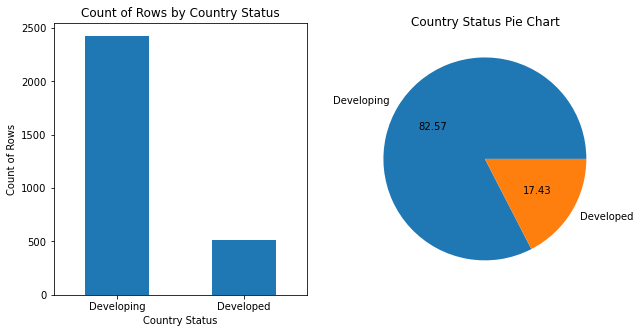

In [20]:
#Chart to show distribution of DEVELOPED countries to DEVELOPING countries
plt.figure(figsize=(10, 5))
plt.subplot(121)
wins_df.status.value_counts().plot(kind='bar')
plt.title('Count of Rows by Country Status')
plt.xlabel('Country Status')
plt.ylabel('Count of Rows')
plt.xticks(rotation=0)

plt.subplot(122)
wins_df.status.value_counts().plot(kind='pie', autopct='%.2f')
plt.ylabel('')
plt.title('Country Status Pie Chart')

plt.show()

This graph, though simple, is important. The above displays that the majority of our data comes from countries listed as 'Developing' - 82.57% to be exact. It is likely that any model used will more accurately depict results for 'Developing' countries over 'Developed' countries as the majority of the data lies within countries that are 'Developing' rather than 'Developed'.

Text(0.5, 1.0, 'Life Expectancy by Year')

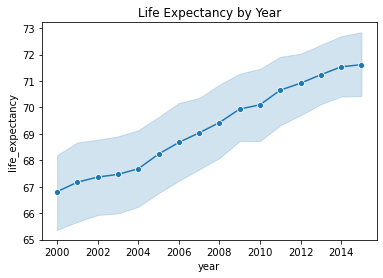

In [21]:
#looking at how life expectancy has changed over the years
sns.lineplot('year', 'life_expectancy', data=wins_df, marker='o')
plt.title('Life Expectancy by Year')

In [22]:
#Correlation check to prove relevancy to a prediction model
wins_df.year.corr(wins_df.life_expectancy)

0.16979644964459023

The correlation between LIFE_EXPECTANCY and YEAR is positive but not very significant (0.17)

In [23]:
#average Life Expectancy grouped by status of the country
wins_df.groupby('status').life_expectancy.agg(['mean'])

,mean
status,
Developed,79.197852
Developing,67.149077


It appears that 'Developed' countries have a much higher average Life Expectancy. But similar to the year comparisons above, is this difference significant? Again, a t-test comparison will be used to find out.

In [24]:
#t-test to check the significance of the means between the 2 Statuses with respect to their Life Expectancy
developed_le = wins_df[wins_df.status == 'Developed'].life_expectancy
developing_le = wins_df[wins_df.status == 'Developing'].life_expectancy
stats.ttest_ind(developed_le, developing_le, equal_var=False)

Ttest_indResult(statistic=47.96440581661328, pvalue=2e-323)

Based on the result of the above t-test, there appears to be a very significant difference between 'Developing' and 'Developed' countries with respect to their Life Expectancy.

In [25]:
#Comparing the STATUS variable to other  continuous variables
wins_df_cols = list(wins_df.columns)
interested_vars = [wins_df_cols[2]]
for col in wins_df_cols[4:]:
    interested_vars.append(col)
    
#Comparing number of descriptive statistics for STATUS values with respect to all the other continuous variables    
wins_df[interested_vars].groupby('status').agg('mean')

,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness_10-19_years,thinness_5-9_years,income_composition_of_resources,schooling
status,,,,,,,,,,,,,,,,,,
Developed,79.685547,27.956075,9.578444,633.176176,86.930131,127.019531,29.022243,34.917279,94.515625,7.076602,94.743229,0.100000,8712.011340,5.721908e+06,1.320703,1.296680,0.831395,15.442519
Developing,178.171332,28.744767,3.598565,207.281125,82.983525,240.460429,27.742029,34.149330,85.674007,5.586479,87.182008,0.547115,3753.287486,6.780085e+06,5.417248,5.420091,0.600405,11.336381


In [26]:
#Checking Signficant differences between the factors and the respective status of the country
developed_df = wins_df[wins_df.status == 'Developed']
developing_df = wins_df[wins_df.status == 'Developing']
for col in interested_vars[1:]:
    print(5*'-' + str(col) + ' Developed/Developing t-test comparison' + 5*'-')
    print('p-value=' +str(stats.ttest_ind(developed_df[col], developing_df[col], equal_var=False)[1]))



-----adult_mortality Developed/Developing t-test comparison-----
p-value=3.416697325850425e-173
-----infant_deaths Developed/Developing t-test comparison-----
p-value=0.43706003820584804
-----alcohol Developed/Developing t-test comparison-----
p-value=7.259688493240182e-204
-----percentage_expenditure Developed/Developing t-test comparison-----
p-value=1.0654031797381314e-67
-----hepatitis_b Developed/Developing t-test comparison-----
p-value=2.723238539034132e-12
-----measles Developed/Developing t-test comparison-----
p-value=2.938258449568768e-18
-----bmi Developed/Developing t-test comparison-----
p-value=1.499863438360631e-39
-----under-five_deaths Developed/Developing t-test comparison-----
p-value=0.5661846613931638
-----polio Developed/Developing t-test comparison-----
p-value=6.135545682773669e-126
-----total_expenditure Developed/Developing t-test comparison-----
p-value=2.8541238880240656e-39
-----diphtheria Developed/Developing t-test comparison-----
p-value=5.8940693171358

This implies that the status of a country is likely highly correlated to the above variables - also from earlier, it is significant in the difference between Life Expectancy as well. 

In [27]:
#To get the correlation between the other factors and the STATUS variable
feat_df = wins_df.join(pd.get_dummies(wins_df.status)).drop(columns='status').copy()
feat_df.iloc[:, 2:].corr().iloc[:, -2:].T

,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under-five_deaths,polio,...,diphtheria,hiv/aids,gdp,population,thinness_10-19_years,thinness_5-9_years,income_composition_of_resources,schooling,Developed,Developing
Developed,0.483121,-0.330289,-0.011644,0.580249,0.420621,0.108121,-0.130744,0.123394,0.010095,0.281827,...,0.298655,-0.298042,0.412356,-0.059438,-0.395916,-0.39975,0.51065,0.50836,1.0,-1.0
Developing,-0.483121,0.330289,0.011644,-0.580249,-0.420621,-0.108121,0.130744,-0.123394,-0.010095,-0.281827,...,-0.298655,0.298042,-0.412356,0.059438,0.395916,0.39975,-0.51065,-0.50836,-1.0,1.0


The Negative values represent DEVELOPING countries, and Positive values represent DEVELOPED countries

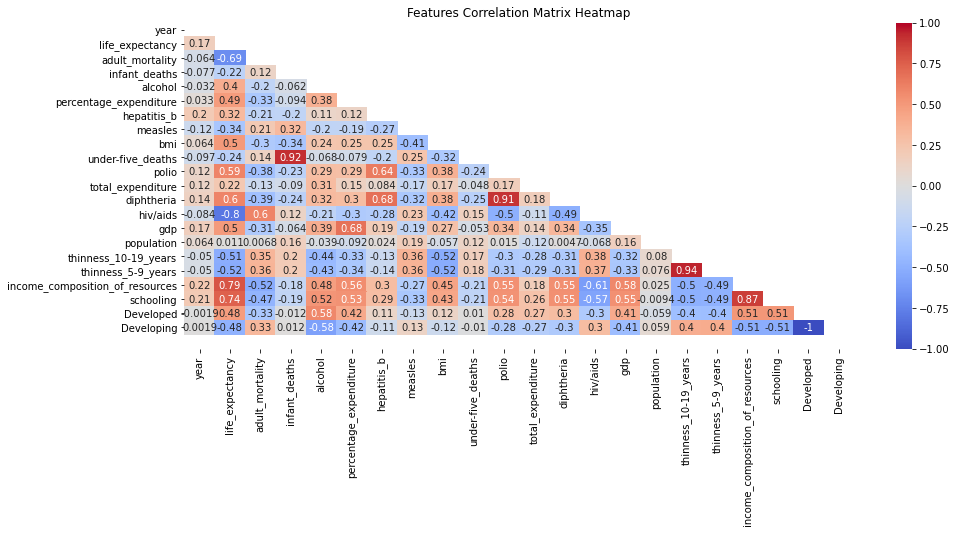

In [28]:
#Correlation HeatMap
def feat_heatmap():
    mask = np.triu(feat_df.corr())
    plt.figure(figsize=(15,6))
    sns.heatmap(feat_df.corr(), annot=True, fmt='.2g', vmin=-1, vmax=1, center=0, cmap='coolwarm', mask=mask)
    plt.ylim(len(feat_df.columns), 0)
    plt.title('Features Correlation Matrix Heatmap')
    plt.show()
feat_heatmap()

OBSERVATIONS:
    
The following are very/extremely highly correlated (correlation > .7 or correlation < -.7):

1. Infant Deaths/Under Five Deaths (Under Five Deaths is more highly correlated to Life Expectancy)
2. GDP/Percentage Expenditure (GDP is more higher correlated to Life Expectancy)
3. Polio/Diphtheria (Diphtheria is more highly correlated to Life Expectancy)
4. Thinness 5-9/Thinness 10-19 
5. Income Composition of Resources/Schooling (Income Composition of Resources is more highly correlated with Life Expectancy)

In [29]:
#Among the 2 strongly correlated variables, we're dropping that which has the least correlation to LIFE EXPECTANCY to make a more accurate heatmap 
#Also dropping YEAR(which doesnt relate to life expectancy at all) and POPULATION because they have very low correlation to life expectancy
feat_df.drop(columns=['measles', 'under-five_deaths','population','year'], inplace=True)

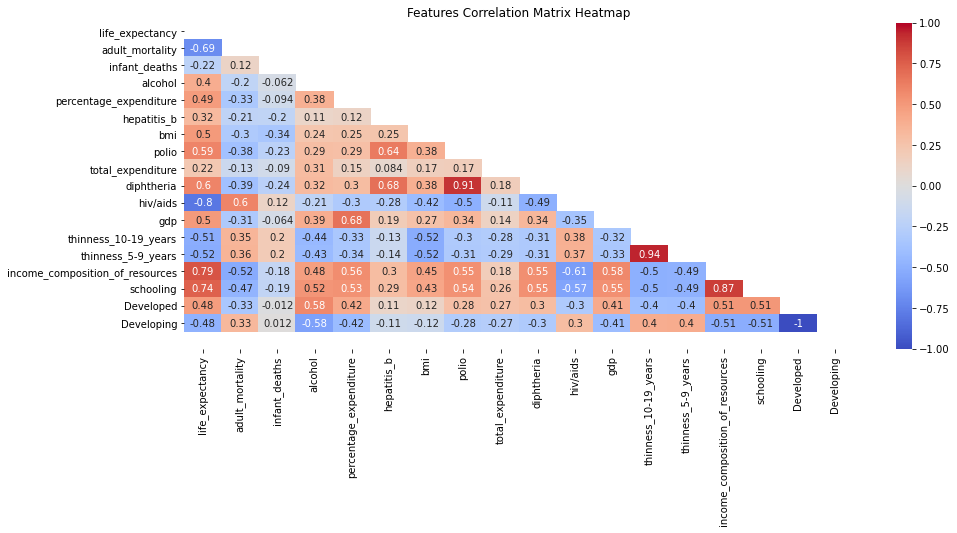

In [30]:
#Updated Heat Map
feat_heatmap()

OBVSERVATION:

Variables significantly correlated to LIFE EXPECTANCY
1. Schooling
2. Income composition of resources
3. HIVE/AIDS
4. Adult Mortality

    Important immunizations; Polio(0.59), Diphtheria(0.6) except Hepatitis B(0.32),are quite significant to LIFE EXPECTANCY

Variables that have little to no impact on LIFE EXPECTANCY(Correlation below 0.5)

1. Alcohol 
2. Percentage expenditure
3. Total expenditure
4. Status of the country (Developed/Developing)
5. Hepatitis B
6. Infant Deaths